In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
def gen_outputs(suffix):
    outputs = []

    dir_path = "/home/yskim/projects/sparse-bfp/conv-outputs"
    prefix_names = ["fwd", "bwd-w", "bwd-a"]
    layer_cnts = [53, 53, 52]
    for i in range(len(layer_cnts)):
        prefix = prefix_names[i]
        layer_cnt = layer_cnts[i]
        for l in range(layer_cnt):
            npy_path = f"{dir_path}/{prefix}-{l + 1 if prefix == 'bwd-a' else l}-{suffix}.npy"
            data = np.load(npy_path, allow_pickle=False)
            outputs.append(data)

    return outputs

In [3]:
outputs_labels = [
    "fp",
    "bfp-no-sort",
    "bfp-sort-64",
    "bfp-sort-256",
    "bfp-sort-1024",
]

outputs = [gen_outputs(label) for label in outputs_labels]

In [4]:
fp_outputs = outputs[0]
output_cnt = len(fp_outputs)

labels = [
    "no-sort",
    "sort-64",
    "sort-256",
    "sort-1024"
]

diffs = [
    [],
    [],
    [],
    []
]

# layers
for o in range(output_cnt):
    # diffs = []

    fp_output = fp_outputs[o]

    # for each precision
    for l in range(1, len(outputs_labels)):
        bfp_output = outputs[l][o]

        diff = np.mean(np.abs(fp_output.flatten() - bfp_output.flatten()))

        # diffs.append(diff)
        diffs[l-1].append(diff)

    print(f"layer {o:3}th: {diffs[0][o]:.6f} {diffs[1][o]:.6f} {diffs[2][o]:.6f} {diffs[3][o]:.6f}")

layer   0th: 0.031739 0.031042 0.025463 0.025463
layer   1th: 0.223167 0.210720 0.201164 0.201164
layer   2th: 0.159868 0.154602 0.125166 0.116406
layer   3th: 0.108864 0.098123 0.088909 0.087327
layer   4th: 0.112655 0.103242 0.097684 0.097684
layer   5th: 0.628134 0.558477 0.474897 0.468425
layer   6th: 0.240425 0.215674 0.181308 0.172668
layer   7th: 0.148277 0.131377 0.115206 0.112602
layer   8th: 0.994200 0.873356 0.754411 0.738181
layer   9th: 0.304565 0.268004 0.228560 0.219750
layer  10th: 0.185735 0.161991 0.142967 0.139500
layer  11th: 0.980753 0.848883 0.725615 0.708537
layer  12th: 0.361261 0.315454 0.275850 0.268021
layer  13th: 0.215927 0.187679 0.164605 0.161178
layer  14th: 0.491023 0.426633 0.364034 0.355605
layer  15th: 1.246355 1.087128 0.950222 0.929775
layer  16th: 0.415233 0.368443 0.325581 0.317970
layer  17th: 0.260239 0.231896 0.205777 0.201545
layer  18th: 1.730691 1.529310 1.354168 1.331172
layer  19th: 0.473397 0.426826 0.384102 0.376479
layer  20th: 0.28752

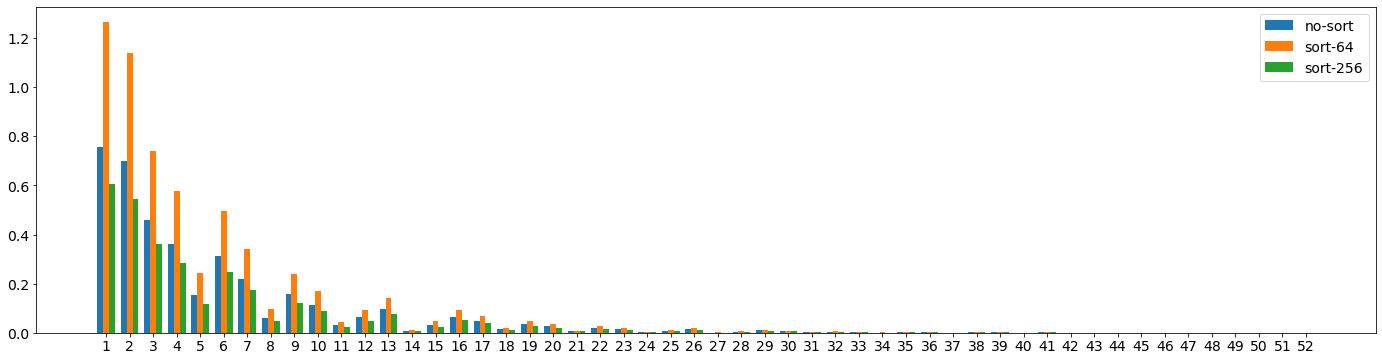

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

width = 0.25
# plt.ylim(0, 0.01)
length = 53 - 1
x_range = np.arange(length)
start = 53 * 2
plt.figure(figsize=(24, 6))
plt.bar(x_range, diffs[0][start:start+length], width, label=labels[0])
plt.bar(x_range + width, diffs[1][start:start+length], width, label=labels[1])
plt.bar(x_range + 2 * width, diffs[2][start:start+length], width, label=labels[2])

plt.xticks(x_range + width, x_range + 1)
plt.legend()